In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy import stats

In [48]:
# definimos función test de normalidad
def normality_test(data):
    alpha = 0.05
    k2, p = stats.normaltest(data)
    if p > alpha:
        print("Distribución Normal")
    else:
        print("Distibución NO Normal")

In [60]:
# Load the data
df_resultado = pd.read_csv('../Data/df_resultado_var1(vec).csv')
df_com_up = pd.read_csv('../Data/df_com_up_var1.csv')
df_com_down = pd.read_csv('../Data/df_com_down_var1.csv')
df_estadisticas_up = pd.read_csv('../Data/df_estadisticas_up.csv', index_col=0)
df_estadisticas_down = pd.read_csv('../Data/df_estadisticas_down.csv', index_col=0)

In [50]:
df_resultado.head()

,prediction,year_2023,year_2024,month_3,month_5,month_6,month_7,month_8,month_9,month_10,...,CAT 797-F,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930ER-MT,Kom.980E5,Komatsu AHS,status
0,125045.860483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.276360,-0.21334,-0.575556,2.735792,-1.756724,0.476865,-0.035749,-2.98167,-0.101592,no_cumple
1,133832.488037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.276360,-0.21334,-0.575556,2.735792,0.191462,0.433466,-0.035749,-2.98167,-0.101592,no_cumple
2,142875.385561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.246214,-0.21334,-0.575556,2.735792,0.191462,0.607062,-0.035749,-2.98167,-0.101592,cumple
3,142712.362782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.914614,-0.21334,-0.575556,2.735792,-1.756724,0.520264,-0.035749,-2.98167,-0.101592,cumple
4,144366.298793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.914614,-0.21334,-0.575556,2.735792,0.191462,0.520264,-0.035749,-2.98167,-0.101592,cumple


In [51]:
print(df_com_up.columns)

Index(['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_10', 'day_11', 'day_13',
       'day_15', 'day_16', 'day_17', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31',
       'shift_B', 'crew_E2', 'crew_E3', 'crew_E4', 'efectivo', 'mantencion',
       'mecanica', 'electrica', 'mant_excl', 'mec_excl', 'demora', 'r_noprg',
       'waiting', 'queued', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
       'KOM-CHQ', 'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT',
       'Kom.980E5', 'Komatsu AHS', 'truck_avail', 'payload_validation'],
      dtype='object')


In [52]:
print(df_com_down.columns)

Index(['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_10', 'day_11', 'day_13',
       'day_15', 'day_16', 'day_17', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31',
       'shift_B', 'crew_E2', 'crew_E3', 'crew_E4', 'efectivo', 'mantencion',
       'mecanica', 'electrica', 'mant_excl', 'mec_excl', 'demora', 'r_noprg',
       'waiting', 'queued', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
       'KOM-CHQ', 'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT',
       'Kom.980E5', 'Komatsu AHS', 'truck_avail', 'payload_validation'],
      dtype='object')


In [61]:
print(df_estadisticas_up.columns)

Index(['total', 'efectivo', 'mantencion', 'mecanica', 'electrica', 'mant_excl',
       'mec_excl', 'elec_excl', 'som_excl', 'demora', 'r_prog', 'r_noprg',
       'waiting', 'queued', 'payload', 'distance', 'distance_down',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930EN', 'Kom.930ER',
       'Kom.930ER-MT', 'Kom.980E5', 'Komatsu AHS', 'truck_avail'],
      dtype='object')


### **_1. Comparamos las Disponibilidades Originales vs las Disponibilidades Finales_**

In [8]:
# utilizamos las columnas de interés
resul_interes = pd.concat([df_resultado[['prediction','distance_up_level','status']],df_com_down[['truck_avail','payload']]],axis=1).copy()
resul_interes = resul_interes[resul_interes['status'] == 'cumple'][['prediction','distance_up_level','truck_avail','payload']]
resul_interes = resul_interes.drop_duplicates().reset_index(drop=True)
resul_interes = resul_interes.rename(columns={'distance_up_level':'dul_new','truck_avail':'ta_original'})
resul_interes

,prediction,dul_new,ta_original,payload
0,142875.385561,0.832416,0.742590,134593.450048
1,142712.362782,0.876929,0.720616,128529.373027
2,144366.298793,0.839472,0.765798,139994.273048
3,142367.244551,0.022343,0.712443,136659.349998
4,142389.202125,0.568855,0.734495,124766.023081
...,...,...,...,...
507,142384.270447,0.852178,0.779352,140439.223881
508,143286.544941,0.865869,0.758762,129308.830067
509,142463.281461,1.144239,0.744534,115542.896976
510,143442.730208,0.839472,0.749142,116144.915930


In [62]:
# des escalamos la variable dul_new
resul_interes['dul_new_normal'] = resul_interes['dul_new'] * df_estadisticas_up['distance_up_level']['std'] \
                          + df_estadisticas_up['distance_up_level']['mean']

In [63]:
# traemos las nuevas truck_avail
for i in range(len(resul_interes)):
    resul_interes.loc[i, 'ta_new'] = df_com_up.loc[df_com_up['distance_up_level'] == resul_interes.loc[i, 'dul_new'], 'truck_avail'].values[0]
    resul_interes.loc[i, 'ta_new'] 

In [78]:
# generamos columnas de diferencia
resul_interes['diff_ta'] = resul_interes['ta_new'] - resul_interes['ta_original'] # diferencia en truck_avail
resul_interes['diff_pay'] = resul_interes['prediction'] - resul_interes['payload'] # diferencia en payload
              

In [79]:
resul_interes

,prediction,dul_new,ta_original,payload,ta_new,diff_ta,dul_new_normal,diff_pay
0,142875.385561,0.832416,0.742590,134593.450048,0.774903,0.032312,5.682420e+06,8281.935513
1,142712.362782,0.876929,0.720616,128529.373027,0.773564,0.052948,5.721900e+06,14182.989755
2,144366.298793,0.839472,0.765798,139994.273048,0.787120,0.021321,5.688678e+06,4372.025745
3,142367.244551,0.022343,0.712443,136659.349998,0.751869,0.039426,4.963939e+06,5707.894553
4,142389.202125,0.568855,0.734495,124766.023081,0.742916,0.008421,5.448659e+06,17623.179044
...,...,...,...,...,...,...,...,...
507,142384.270447,0.852178,0.779352,140439.223881,0.787995,0.008643,5.699948e+06,1945.046566
508,143286.544941,0.865869,0.758762,129308.830067,0.801344,0.042582,5.712090e+06,13977.714873
509,142463.281461,1.144239,0.744534,115542.896976,0.822237,0.077703,5.958986e+06,26920.384484
510,143442.730208,0.839472,0.749142,116144.915930,0.787120,0.037978,5.688678e+06,27297.814278


<Axes: ylabel='Frequency'>

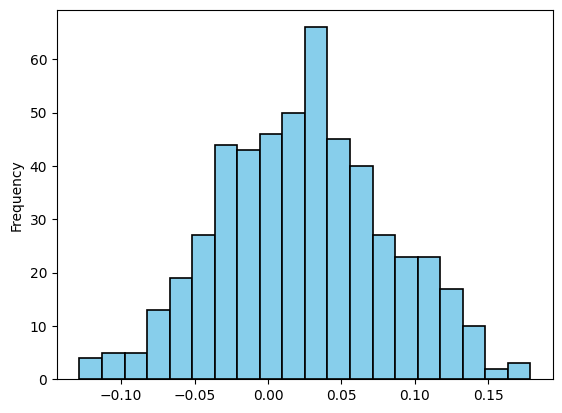

In [32]:
resul_interes['diff_ta'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

<Axes: ylabel='Frequency'>

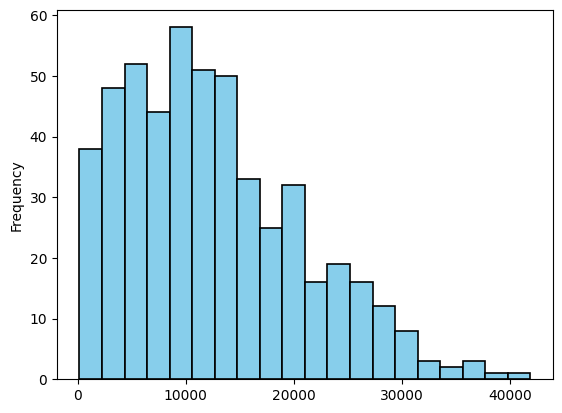

In [80]:
resul_interes['diff_pay'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

In [87]:
ta_menor_a_15mil = resul_interes[resul_interes['diff_pay'] < 10_000]['ta_new'].copy()
ta_menor_a_15mil = pd.DataFrame(ta_menor_a_15mil, columns=['ta_new']).reset_index(drop=True)
ta_menor_a_15mil

,ta_new
0,0.774903
1,0.787120
2,0.751869
3,0.747098
4,0.710037
...,...
222,0.787120
223,0.787120
224,0.801344
225,0.801344


In [89]:
ta_menor_a_15mil.ta_new.describe()

count    227.000000
mean       0.758932
std        0.036475
min        0.647743
25%        0.732591
50%        0.762420
75%        0.787120
max        0.841171
Name: ta_new, dtype: float64

In [70]:
# buscamos las coincidencias de las distance_up_level
coincidencia = df_com_up[df_com_up['distance_up_level'].isin(resul_interes['dul_new'])]
coincidencia = coincidencia[['distance_up_level','truck_avail']]
coincidencia = coincidencia.rename(columns={'truck_avail':'ta_new'})
coincidencia

,distance_up_level,ta_new
0,1.522682,0.841171
1,1.144239,0.822237
2,1.408364,0.807127
3,0.891184,0.818624
7,0.852178,0.787995
...,...,...
625,-1.034521,0.688605
627,-1.279719,0.747554
653,-0.842504,0.719127
690,-0.926930,0.761962


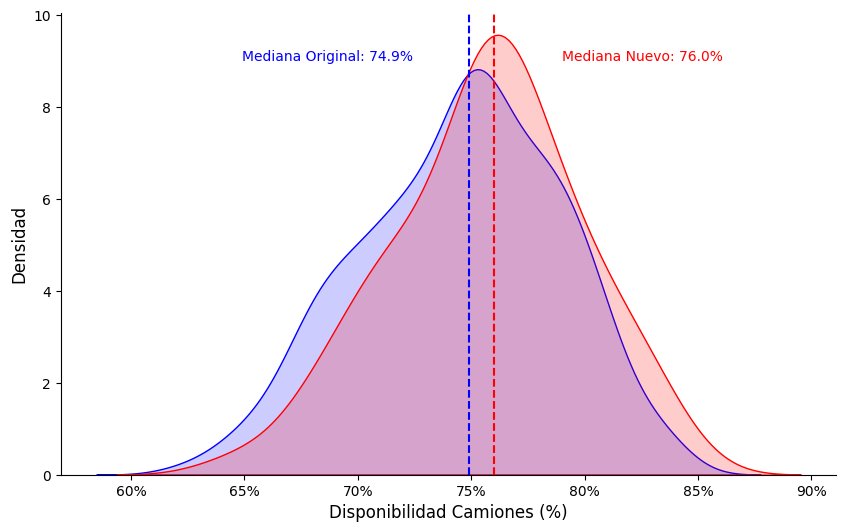

In [73]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.kdeplot(resul_interes['ta_original'], label='Original', color='blue', linewidth=1, fill=True, alpha=0.2)
sns.kdeplot(coincidencia['ta_new'], label='Nuevo', color='red', linewidth=1, fill=True, alpha=0.2)

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.xlabel('Disponibilidad Camiones (%)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculamos la media de cada distribución
mediana_original = resul_interes['ta_original'].median()
mediana_nueva = coincidencia['ta_new'].median()

# Añadimos líneas verticales en las medias
plt.axvline(mediana_original, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mediana_nueva, color='red', linestyle='--', linewidth=1.5)

# Añadimos texto con las medias
plt.text(mediana_original - 0.1, 9, f'Mediana Original: {mediana_original:.1%}', fontsize=10, color='blue')
plt.text(mediana_nueva + 0.03, 9, f'Mediana Nuevo: {mediana_nueva:.1%}', fontsize=10, color='red')

# Mostramos el gráfico
plt.show()

In [75]:
# Test de normalidad
normality_test(resul_interes['ta_original'])
normality_test(coincidencia['ta_new'])

Distibución NO Normal
Distribución Normal


In [76]:
resul_interes['ta_original'].describe(), coincidencia['ta_new'].describe()

(count    512.000000
 mean       0.744974
 std        0.044094
 min        0.622591
 25%        0.713344
 50%        0.748889
 75%        0.778749
 max        0.839586
 Name: ta_original, dtype: float64,
 count    64.000000
 mean      0.756440
 std       0.041428
 min       0.647743
 25%       0.728949
 50%       0.759843
 75%       0.787338
 max       0.841171
 Name: ta_new, dtype: float64)

In [77]:
resul_interes['payload'].describe(), resul_interes['prediction'].describe() 

(count       512.000000
 mean     130695.878862
 std        8254.003820
 min      101982.754015
 25%      125430.383491
 50%      132024.044460
 75%      137441.975726
 max      142240.075257
 Name: payload, dtype: float64,
 count       512.000000
 mean     143256.918406
 std        1388.620057
 min      142358.670809
 25%      142461.851919
 50%      142766.723495
 75%      143530.232899
 max      151280.917631
 Name: prediction, dtype: float64)